In [12]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import cv2
import os

In [13]:
videos = os.listdir("./sample/")
video = videos[0]
image = cv2.imread("./sample/bart.png")
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hsv = hsv.reshape((254*254,3))
cluster = KMeans(n_clusters=5)
cluster.fit(hsv)

KMeans(n_clusters=5)

In [14]:
df = pd.DataFrame(hsv)
df.rename(columns={0:'h',1:'s',2:'v'}, inplace=True)
df['label'] = cluster.labels_
fig = px.scatter_3d(df, x='h', y='s', z='v',
            color='label')
fig.show()

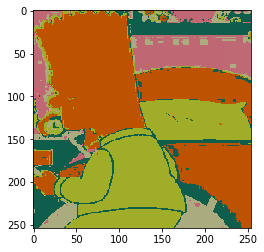

In [15]:
label_color = {k:np.int8(color) for k, color in enumerate(cluster.cluster_centers_)}
image_seg = cluster.labels_.reshape((254,254))
image_color = np.zeros((254,254,3))
for i in range(254):
    for j in range(254):
        image_color[i,j] = label_color[image_seg[i,j]]
image_color = np.uint8(image_color)
image_color = cv2.cvtColor(image_color, cv2.COLOR_HSV2RGB)
p = plt.imshow(image_color)
plt.show(p)

In [17]:
image_seg[50,50]

0